In [50]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from functools import partial

## Importing Data

First, we import the data and split it in a train and test set. We further split the training data of the fashion_mnist dataset into a validation and training set.

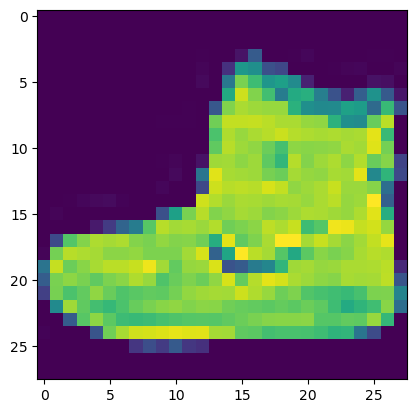

In [51]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train_full[0])

In [52]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [82]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train_full[0]])
X_train_full.shape

Ankle boot


(60000, 28, 28)

## MLP implementation

In this section, we use a sequential model on the fashion_mnist dataset.

### Original model from book

The following code comes from the textbook, we will use this model as a starting point. Later, we will try different hyperparameters for this model.

In [54]:
model = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [57]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2022-11-21 01:11:11.202765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7305 - accuracy: 0.7583

2022-11-21 01:11:20.288545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 5ms/step - loss: 0.7305 - accuracy: 0.7583 - val_loss: 0.5118 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4905 - accuracy: 0.8299 - val_loss: 0.4457 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4449 - accuracy: 0.8444 - val_loss: 0.4330 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4163 - accuracy: 0.8554 - val_loss: 0.4116 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3946 - accuracy: 0.8619 - val_loss: 0.3909 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3780 - accuracy: 0.8686 - val_loss: 0.3756 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3658 - accuracy: 0.8716 - val_loss: 0.3556 - val_accuracy: 0.8770
E

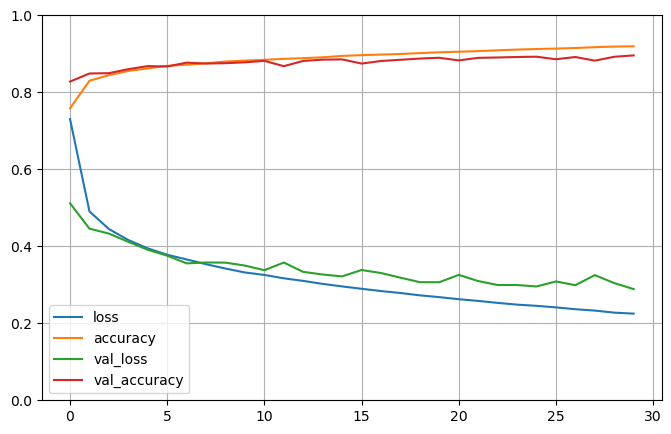

Accuracy [0.9192909002304077]


In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", history.history["accuracy"][-1:])

As can be seen, the performance is not that great yet. So, we will change some hyperparameters to see how this influences the performance.

### Hyperparameter testing/tuning

In [59]:
# Extra layers
model2 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

# softplus
model3 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="softplus"),
 keras.layers.Dense(100, activation="softplus"),
 keras.layers.Dense(10, activation="softmax")
])

# tanh and L1
model4 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="tanh", kernel_regularizer='l1'),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

# sigmoid and dropout
model5 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="sigmoid"),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(100, activation="sigmoid"),
 keras.layers.Dense(10, activation="softmax")
])

# L1 and L2
model6 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu", kernel_regularizer='l2'),
 keras.layers.Dense(100, activation="relu", kernel_regularizer='l1'),
 keras.layers.Dense(10, activation="softmax")
])

# L1L2
model7 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu", kernel_regularizer='l1_l2'),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [60]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model3.compile(loss="sparse_categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])
model4.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
model5.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.5), metrics=["accuracy"])
model6.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])
model7.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

In [72]:
history2 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.5726 - val_accuracy: 0.8968
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.5855 - val_accuracy: 0.8978
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.5920 - val_accuracy: 0.8954
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.5960 - val_accuracy: 0.8974
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.5788 - val_accuracy: 0.8972
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.5817 - val_accuracy: 0.8964
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.5829 - val_accuracy

In [73]:
history3 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6096 - val_accuracy: 0.8974
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6094 - val_accuracy: 0.8982
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6100 - val_accuracy: 0.8978
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6131 - val_accuracy: 0.8978
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6149 - val_accuracy: 0.8978
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6112 - val_accuracy: 0.8972
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6152 - val_accuracy:

In [63]:
history4 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0823 - accuracy: 0.9717 - val_loss: 0.3888 - val_accuracy: 0.8900
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0828 - accuracy: 0.9714 - val_loss: 0.3347 - val_accuracy: 0.9000
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0803 - accuracy: 0.9719 - val_loss: 0.3409 - val_accuracy: 0.8974
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0793 - accuracy: 0.9729 - val_loss: 0.3493 - val_accuracy: 0.8958
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0790 - accuracy: 0.9732 - val_loss: 0.3495 - val_accuracy: 0.8984
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0762 - accuracy: 0.9744 - val_loss: 0.3635 - val_accuracy: 0.8972
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0770 - accuracy: 0.9734 - val_loss: 0.3759 - val_accuracy:

In [64]:
history5 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.4158 - val_accuracy: 0.8946
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.4164 - val_accuracy: 0.8970
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.4335 - val_accuracy: 0.8956
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.3945 - val_accuracy: 0.8996
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.4059 - val_accuracy: 0.8994
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.4144 - val_accuracy: 0.8966
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.4436 - val_accuracy:

In [65]:
history6 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0276 - accuracy: 0.9920 - val_loss: 0.5084 - val_accuracy: 0.8948
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0254 - accuracy: 0.9928 - val_loss: 0.4704 - val_accuracy: 0.8944
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.4761 - val_accuracy: 0.8984
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0243 - accuracy: 0.9934 - val_loss: 0.4662 - val_accuracy: 0.9014
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0250 - accuracy: 0.9930 - val_loss: 0.4660 - val_accuracy: 0.8946
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.5241 - val_accuracy: 0.8924
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.4853 - val_accuracy:

In [66]:
history7 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0142 - accuracy: 0.9967 - val_loss: 0.5401 - val_accuracy: 0.8924
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0109 - accuracy: 0.9979 - val_loss: 0.5210 - val_accuracy: 0.8980
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0104 - accuracy: 0.9981 - val_loss: 0.5280 - val_accuracy: 0.8982
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.5326 - val_accuracy: 0.8970
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0087 - accuracy: 0.9988 - val_loss: 0.5688 - val_accuracy: 0.8938
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0099 - accuracy: 0.9981 - val_loss: 0.5299 - val_accuracy: 0.8974
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.5525 - val_accu

Validation accuracies at final epoch of each model: 


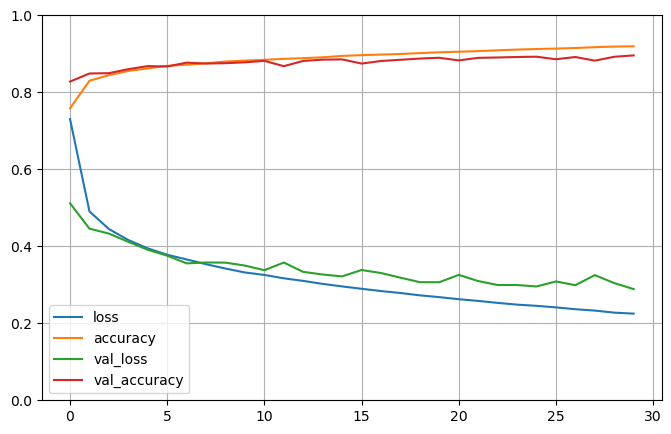

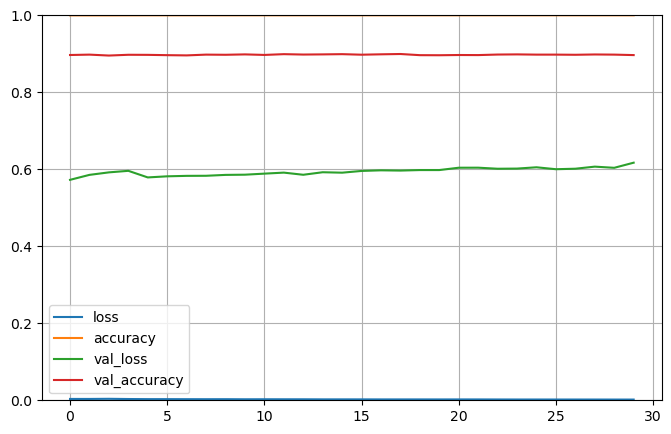

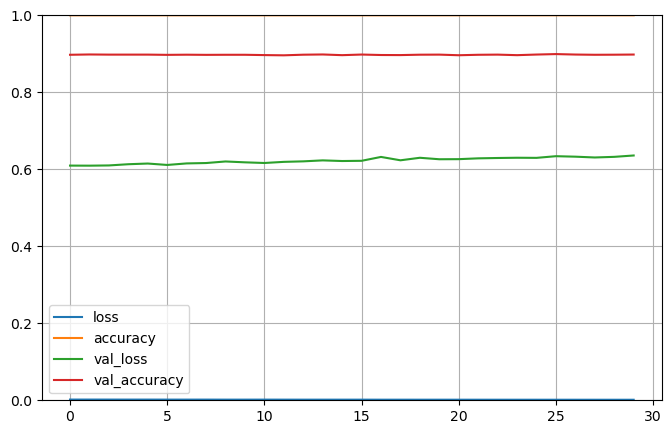

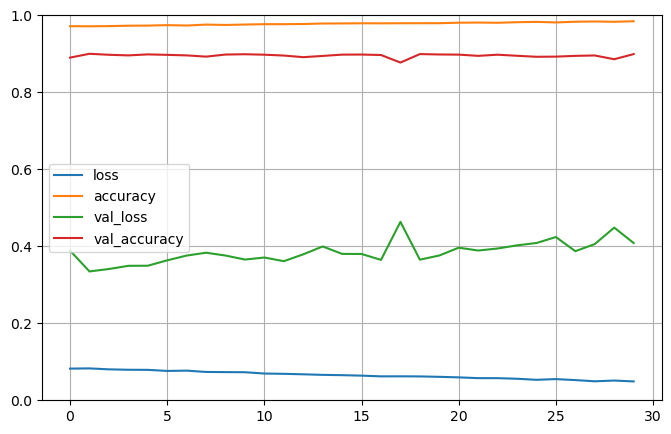

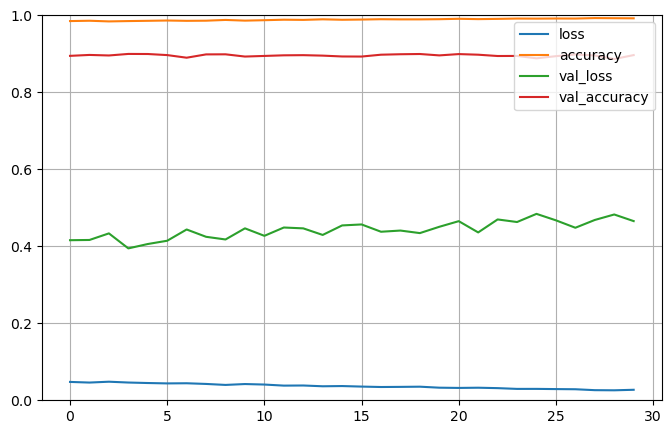

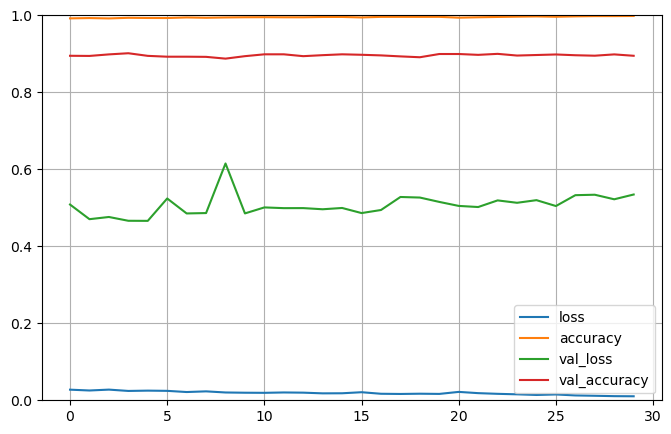

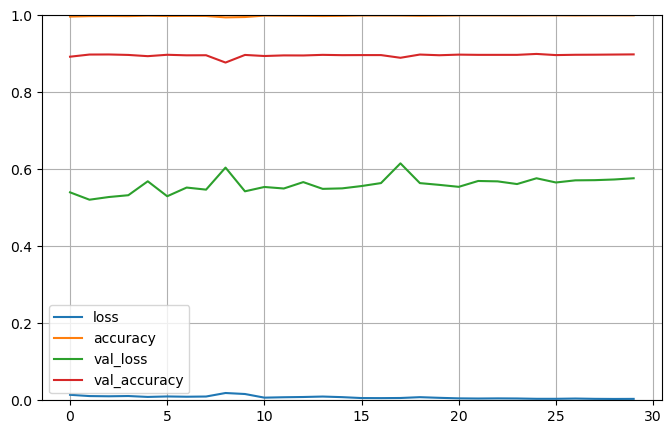

In [74]:
print('Validation accuracies at final epoch of each model: ')
for x in [history, history2, history3, history4, history5, history6, history7]:
    pd.DataFrame(x.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

## CNN implementation

Next, we use a CNN on the same dataset and try out different parameters

### Original model from book

The below code shows the original model as described in the textbook. Just like before, this model is used as the base model. Using this model, we will try different hyperparameters. But now we replace it with selu instead of relu activation function.

In [75]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='selu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='selu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [76]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [77]:
cnnhis = cnn.fit(X_train, y_train, epochs=18, validation_data=(X_valid, y_valid))


Epoch 1/18


2022-11-21 02:15:37.969539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.6032 - accuracy: 0.7924

2022-11-21 02:17:18.910234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 104s 60ms/step - loss: 0.6032 - accuracy: 0.7924 - val_loss: 0.3411 - val_accuracy: 0.8780
Epoch 2/18
1719/1719 [==============================] - 103s 60ms/step - loss: 0.3812 - accuracy: 0.8646 - val_loss: 0.3150 - val_accuracy: 0.8854
Epoch 3/18
1719/1719 [==============================] - 103s 60ms/step - loss: 0.3285 - accuracy: 0.8823 - val_loss: 0.2988 - val_accuracy: 0.8844
Epoch 4/18
1719/1719 [==============================] - 104s 61ms/step - loss: 0.2922 - accuracy: 0.8935 - val_loss: 0.2709 - val_accuracy: 0.9008
Epoch 5/18
1719/1719 [==============================] - 103s 60ms/step - loss: 0.2629 - accuracy: 0.9051 - val_loss: 0.2566 - val_accuracy: 0.9016
Epoch 6/18
1719/1719 [==============================] - 103s 60ms/step - loss: 0.2390 - accuracy: 0.9133 - val_loss: 0.2602 - val_accuracy: 0.9038
Epoch 7/18
1719/1719 [==============================] - 104s 60ms/step - loss: 0.2150 - accuracy: 0.9228 - val_loss: 0.2663 - val

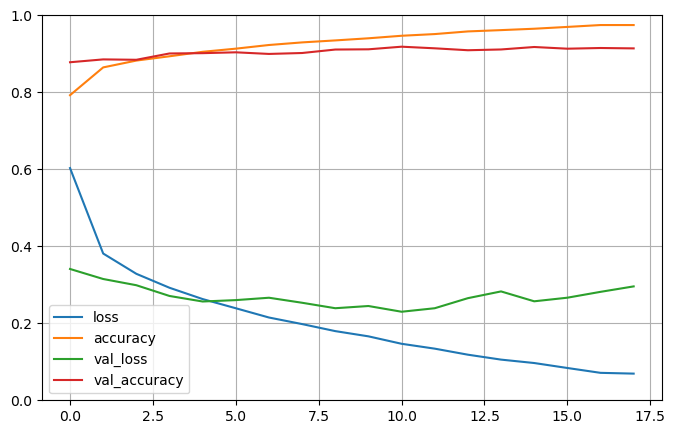

Accuracy [0.9745999574661255]
Val-Accuracy [0.9140000343322754]
Loss [0.06924889981746674]
Val-Loss [0.2958138883113861]


In [78]:
pd.DataFrame(cnnhis.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnhis.history["accuracy"][-1:])
print("Val-Accuracy", cnnhis.history["val_accuracy"][-1:])
print("Loss", cnnhis.history["loss"][-1:])
print("Val-Loss", cnnhis.history["val_loss"][-1:])

Model is overfitting, time to add regularisation.

In [215]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='selu'),
 keras.layers.Dense(units=64, activation='selu', kernel_regularizer='l2'),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [216]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
cnn.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_66 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 7, 7, 256)       

In [219]:
cnnhis = cnn.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 46s 27ms/step - loss: 0.2166 - accuracy: 0.9247 - val_loss: 0.2779 - val_accuracy: 0.9042
Epoch 2/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.2085 - accuracy: 0.9275 - val_loss: 0.2966 - val_accuracy: 0.8986
Epoch 3/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.2017 - accuracy: 0.9296 - val_loss: 0.3308 - val_accuracy: 0.8920
Epoch 4/30
1719/1719 [==============================] - 47s 27ms/step - loss: 0.1949 - accuracy: 0.9327 - val_loss: 0.2843 - val_accuracy: 0.9014
Epoch 5/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.1884 - accuracy: 0.9359 - val_loss: 0.2796 - val_accuracy: 0.9020
Epoch 6/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.1821 - accuracy: 0.9367 - val_loss: 0.2801 - val_accuracy: 0.9044
Epoch 7/30
1719/1719 [==============================] - 46s 27ms/step - loss: 0.1758 - accuracy: 0.9398 - val_loss: 0.2683 -

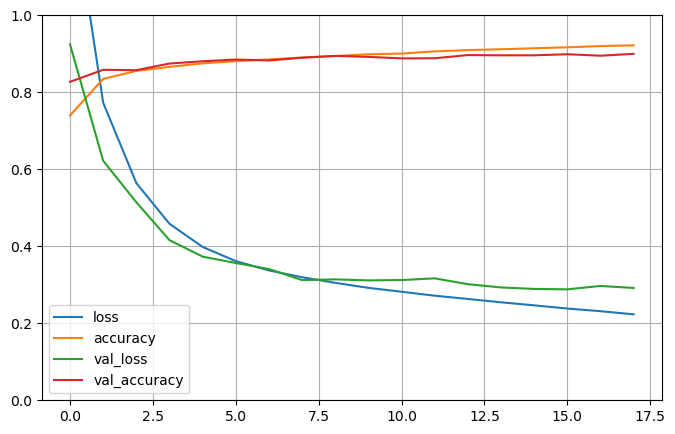

Accuracy [0.9218726754188538]
Val-Accuracy [0.8998000621795654]
Loss [0.22317025065422058]
Val-Loss [0.29170408844947815]


In [218]:
pd.DataFrame(cnnhis.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnhis.history["accuracy"][-1:])
print("Val-Accuracy", cnnhis.history["val_accuracy"][-1:])
print("Loss", cnnhis.history["loss"][-1:])
print("Val-Loss", cnnhis.history["val_loss"][-1:])

# CiFAR10


In [135]:
(X_traincif, y_traincif), (X_testcif, y_testcif) = cifar10.load_data()

In [144]:
X_traincif = X_traincif/255
X_testcif = X_testcif/255

In [150]:
print(X_traincif.shape)
X_validCif, X_trainCif = X_traincif[:5000], X_traincif[5000:]
y_validCif, y_trainCif = y_traincif[:5000], y_traincif[5000:]
print(X_validCif.shape)
print(X_trainCif.shape)

(50000, 32, 32, 3)
(5000, 32, 32, 3)
(45000, 32, 32, 3)


In [151]:
outputs = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

airplane


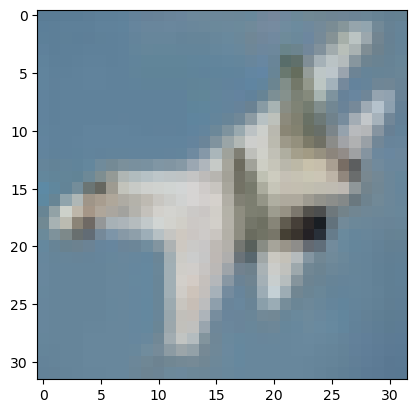

In [165]:
t = 10
print(outputs[int(y_testcif[t])])
plt.imshow(X_testcif[t])

## MLP for CiFAR 10


In [199]:
model = Sequential([
 keras.layers.Flatten(input_shape=[32, 32, 3]),
 keras.layers.Dense(3072, activation="selu"),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(768, activation="selu"),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 3072)              0         
                                                                 
 dense_85 (Dense)            (None, 3072)              9440256   
                                                                 
 dropout_27 (Dropout)        (None, 3072)              0         
                                                                 
 dense_86 (Dense)            (None, 768)               2360064   
                                                                 
 dropout_28 (Dropout)        (None, 768)               0         
                                                                 
 dense_87 (Dense)            (None, 10)                7690      
                                                                 
Total params: 11,808,010
Trainable params: 11,808,010

In [200]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [201]:
history = model.fit(X_trainCif, y_trainCif, epochs=20, validation_data=(X_validCif, y_validCif))

Epoch 1/20


2022-11-21 20:54:53.069555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 3.6966 - accuracy: 0.1776

2022-11-21 20:55:25.031162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 34s 23ms/step - loss: 3.6966 - accuracy: 0.1776 - val_loss: 4.4532 - val_accuracy: 0.1414
Epoch 2/20
1407/1407 [==============================] - 32s 23ms/step - loss: 3.6852 - accuracy: 0.1705 - val_loss: 3.3283 - val_accuracy: 0.1038
Epoch 3/20
1407/1407 [==============================] - 30s 22ms/step - loss: 3.9681 - accuracy: 0.1013 - val_loss: 3.7600 - val_accuracy: 0.0996
Epoch 4/20
1407/1407 [==============================] - 31s 22ms/step - loss: 3.7373 - accuracy: 0.0995 - val_loss: 3.8695 - val_accuracy: 0.1038
Epoch 5/20
1407/1407 [==============================] - 31s 22ms/step - loss: 3.8491 - accuracy: 0.1010 - val_loss: 3.6896 - val_accuracy: 0.0920
Epoch 6/20
1407/1407 [==============================] - 31s 22ms/step - loss: 3.9143 - accuracy: 0.1022 - val_loss: 3.3646 - val_accuracy: 0.0976
Epoch 7/20
1407/1407 [==============================] - 30s 21ms/step - loss: 3.8028 - accuracy: 0.1012 - val_loss: 3.5994 - val_accura

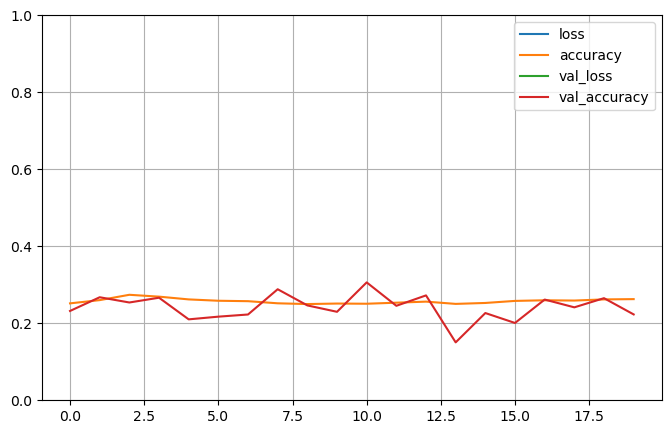

Accuracy [0.2627333402633667]
Val-Accuracy [0.22300000488758087]
Loss [2.847649097442627]
Val-Loss [2.920374631881714]


In [198]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", history.history["accuracy"][-1:])
print("Val-Accuracy", history.history["val_accuracy"][-1:])
print("Loss", history.history["loss"][-1:])
print("Val-Loss", history.history["val_loss"][-1:])

## CNN

In [193]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnnModel = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='selu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='selu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

cnnModel.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 64)        12352     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 256)       

In [194]:
cnnModel.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [195]:
cnnHistory = cnnModel.fit(X_trainCif, y_trainCif, epochs=18, validation_data=(X_validCif, y_validCif))

Epoch 1/18


2022-11-21 20:24:29.909420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 2.3046 - accuracy: 0.1007

2022-11-21 20:25:13.908426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 47s 32ms/step - loss: 2.3046 - accuracy: 0.1007 - val_loss: 2.3040 - val_accuracy: 0.1038
Epoch 2/18
1407/1407 [==============================] - 43s 30ms/step - loss: 2.3047 - accuracy: 0.0994 - val_loss: 2.3035 - val_accuracy: 0.0996
Epoch 3/18
1407/1407 [==============================] - 44s 31ms/step - loss: 2.3046 - accuracy: 0.1022 - val_loss: 2.3040 - val_accuracy: 0.0972
Epoch 4/18
1407/1407 [==============================] - 44s 32ms/step - loss: 2.3048 - accuracy: 0.0986 - val_loss: 2.3040 - val_accuracy: 0.0976
Epoch 5/18
1407/1407 [==============================] - 43s 30ms/step - loss: 2.3048 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1038
Epoch 6/18
1407/1407 [==============================] - 44s 31ms/step - loss: 2.3046 - accuracy: 0.0977 - val_loss: 2.3034 - val_accuracy: 0.1038
Epoch 7/18
1407/1407 [==============================] - 43s 31ms/step - loss: 2.3046 - accuracy: 0.1009 - val_loss: 2.3028 - val_accura

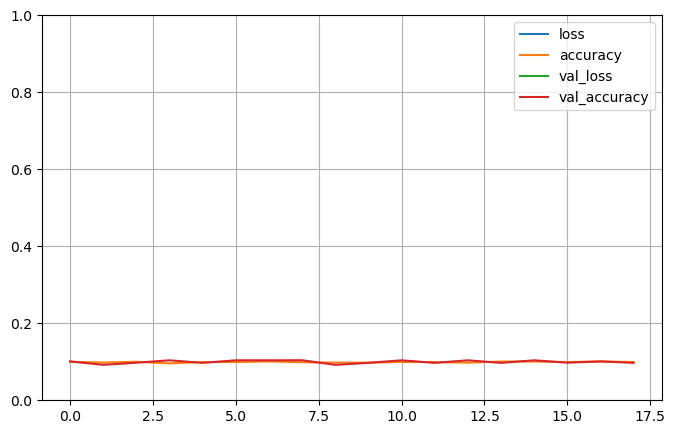

Accuracy [0.09933333098888397]
Val-Accuracy [0.09720000624656677]
Loss [2.304429054260254]
Val-Loss [2.0186219215393066]


In [188]:
pd.DataFrame(cnnHistory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print("Accuracy", cnnHistory.history["accuracy"][-1:])
print("Val-Accuracy", cnnHistory.history["val_accuracy"][-1:])
print("Loss", cnnHistory.history["loss"][-1:])
print("Val-Loss", history.history["val_loss"][-1:])

Well that is a lot better, but what about black and white transformed.

## Testing best models on different dataset